<a href="https://colab.research.google.com/github/suhashgampa1/Deep_Learning/blob/main/BOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.feature_extraction import text

In [ ]:
with open('/content/1661-0.txt', 'r', encoding='utf-8') as f:
    documents = f.read()


In [ ]:
stop_words = text.ENGLISH_STOP_WORDS


Bag of Words (BOW) Representation:
   abandoned  abandons  abbots  aberdeen  abhorrent  abide  abiding  abjure  \
0          3         1       1         2          1      1        1       1   

   able  abnormal  ...  yonder  young  younger  youngster  youth  zealand  \
0    31         1  ...       1     81        3          2      7        1   

   zero  zest  zigzag  zip  
0     2     1       1    1  

[1 rows x 7732 columns]


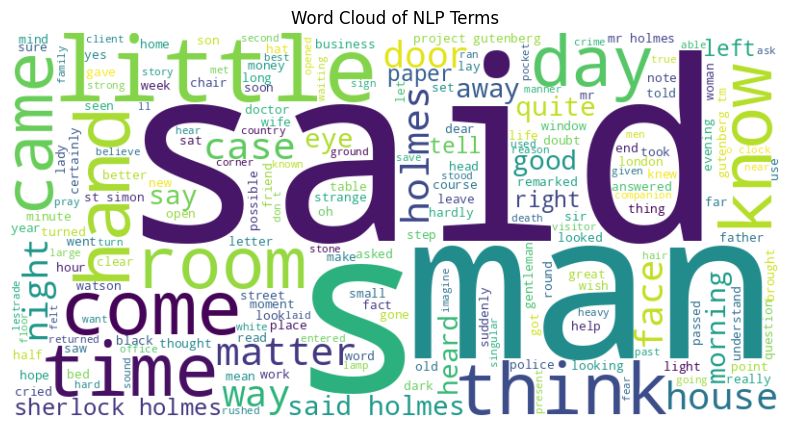

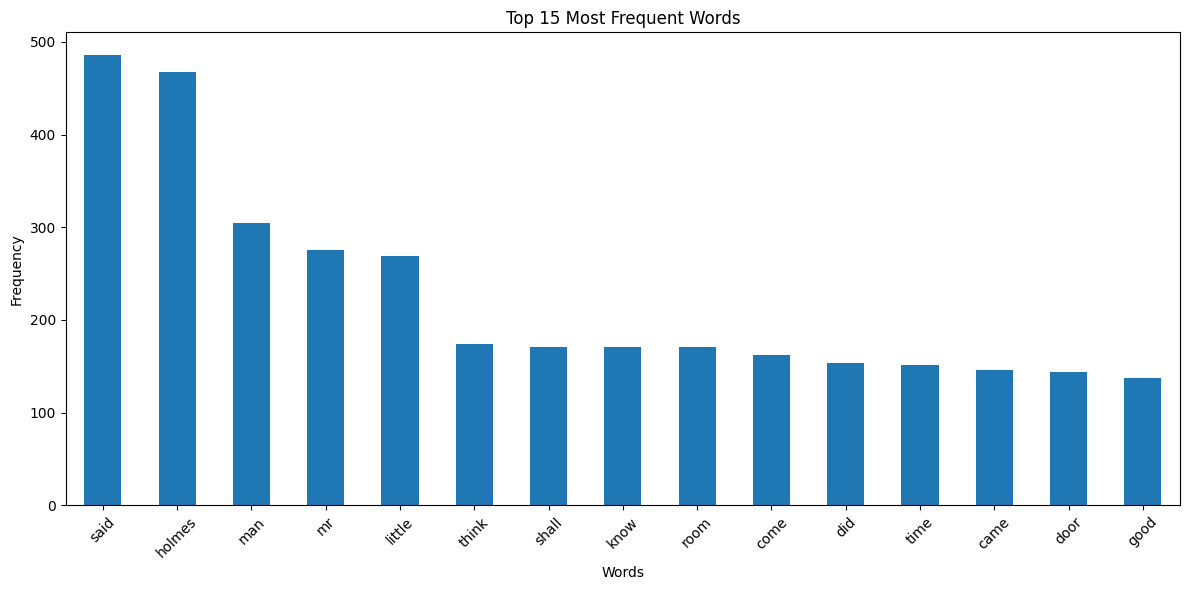

In [ ]:
def preprocess_text(text):
    text = text.lower()
    tokens = re.findall(r'\b[a-z]+\b', text)  # Keep only words
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Preprocess all documents (corrected to preprocess the single large text string)
processed_docs = [preprocess_text(documents)]

# Create Bag of Words (BOW) representation
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(processed_docs)

# Convert BOW matrix to DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print("\nBag of Words (BOW) Representation:")
print(bow_df)

# Generate word cloud
all_text = ' '.join(processed_docs)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of NLP Terms')
plt.show()

# Top 25 frequent words
word_freq = bow_df.sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 6))
word_freq.plot(kind='bar')
plt.title('Top 15 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
with open('/content/1661-0.txt', 'r', encoding='utf-8') as f:
    docs = f.read()

In [ ]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(processed_docs) # Corrected: using processed_docs, which is a list of strings
print("\nBag of Words Vocabulary:", vectorizer.get_feature_names_out())
print("BoW Matrix:\n",bow.toarray())


Bag of Words Vocabulary: ['abandoned' 'abandons' 'abbots' ... 'zest' 'zigzag' 'zip']
BoW Matrix:
 [[3 1 1 ... 1 1 1]]


In [ ]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(processed_docs)
print("\nTF-IDF Vocabulary:", tfidf.get_feature_names_out())
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())


TF-IDF Vocabulary: ['abandoned' 'abandons' 'abbots' ... 'zest' 'zigzag' 'zip']
TF-IDF Matrix:
 [[0.00214915 0.00071638 0.00071638 ... 0.00071638 0.00071638 0.00071638]]
